<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/instrument_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

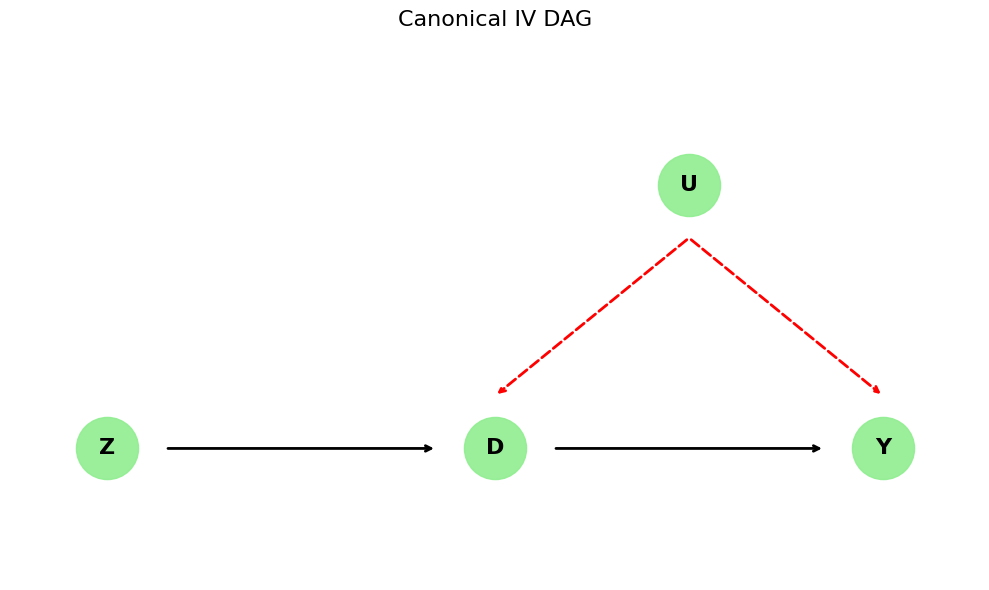

Graph nodes: ['Z', 'D', 'Y', 'U']
Graph edges: [('Z', 'D'), ('D', 'Y'), ('U', 'D'), ('U', 'Y')]


In [ ]:
# # Install required packages
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Z")
G.add_node("D")
G.add_node("Y")
G.add_node("U")  # Add the confounder

# Add edges to represent the causal relationships
G.add_edge("Z", "D")
G.add_edge("D", "Y")
# Add confounder edges with dashed style attribute
G.add_edge("U", "D", style='dashed')
G.add_edge("U", "Y", style='dashed')

# Set up the plot
plt.figure(figsize=(10, 6))

# Create hierarchical positions (same as before)
pos = {
    "Z": (0, 1),
    "D": (2, 1),
    "Y": (4, 1),
    "U": (3, 2)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000,
                      node_color='lightgreen', alpha=0.9)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

# Get current axis
ax = plt.gca()

# Manually draw arrows with shortened lengths
# Z -> D
ax.annotate("", xy=(1.7, 1), xytext=(0.3, 1),  # Shortened from (2,1) and (0,1)
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# D -> Y/π
ax.annotate("", xy=(3.7, 1), xytext=(2.3, 1),  # Shortened from (4,1) and (2,1)
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# U -> D (dashed)
ax.annotate("", xy=(2, 1.2), xytext=(3, 1.8),  # Shortened to not touch nodes
            arrowprops=dict(arrowstyle='->', lw=2, color='red',
                          linestyle='dashed'))

# U -> Y/π (dashed)
ax.annotate("", xy=(4, 1.2), xytext=(3, 1.8),  # Shortened to not touch nodes
            arrowprops=dict(arrowstyle='->', lw=2, color='red',
                          linestyle='dashed'))

# Remove axes and show plot
plt.axis('off')
plt.title('Canonical IV DAG', fontsize=16, pad=20)

# Set axis limits to ensure everything is visible
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.5, 2.5)

plt.tight_layout()
plt.show()

# Print the graph structure
print("Graph nodes:", list(G.nodes()))
print("Graph edges:", list(G.edges()))

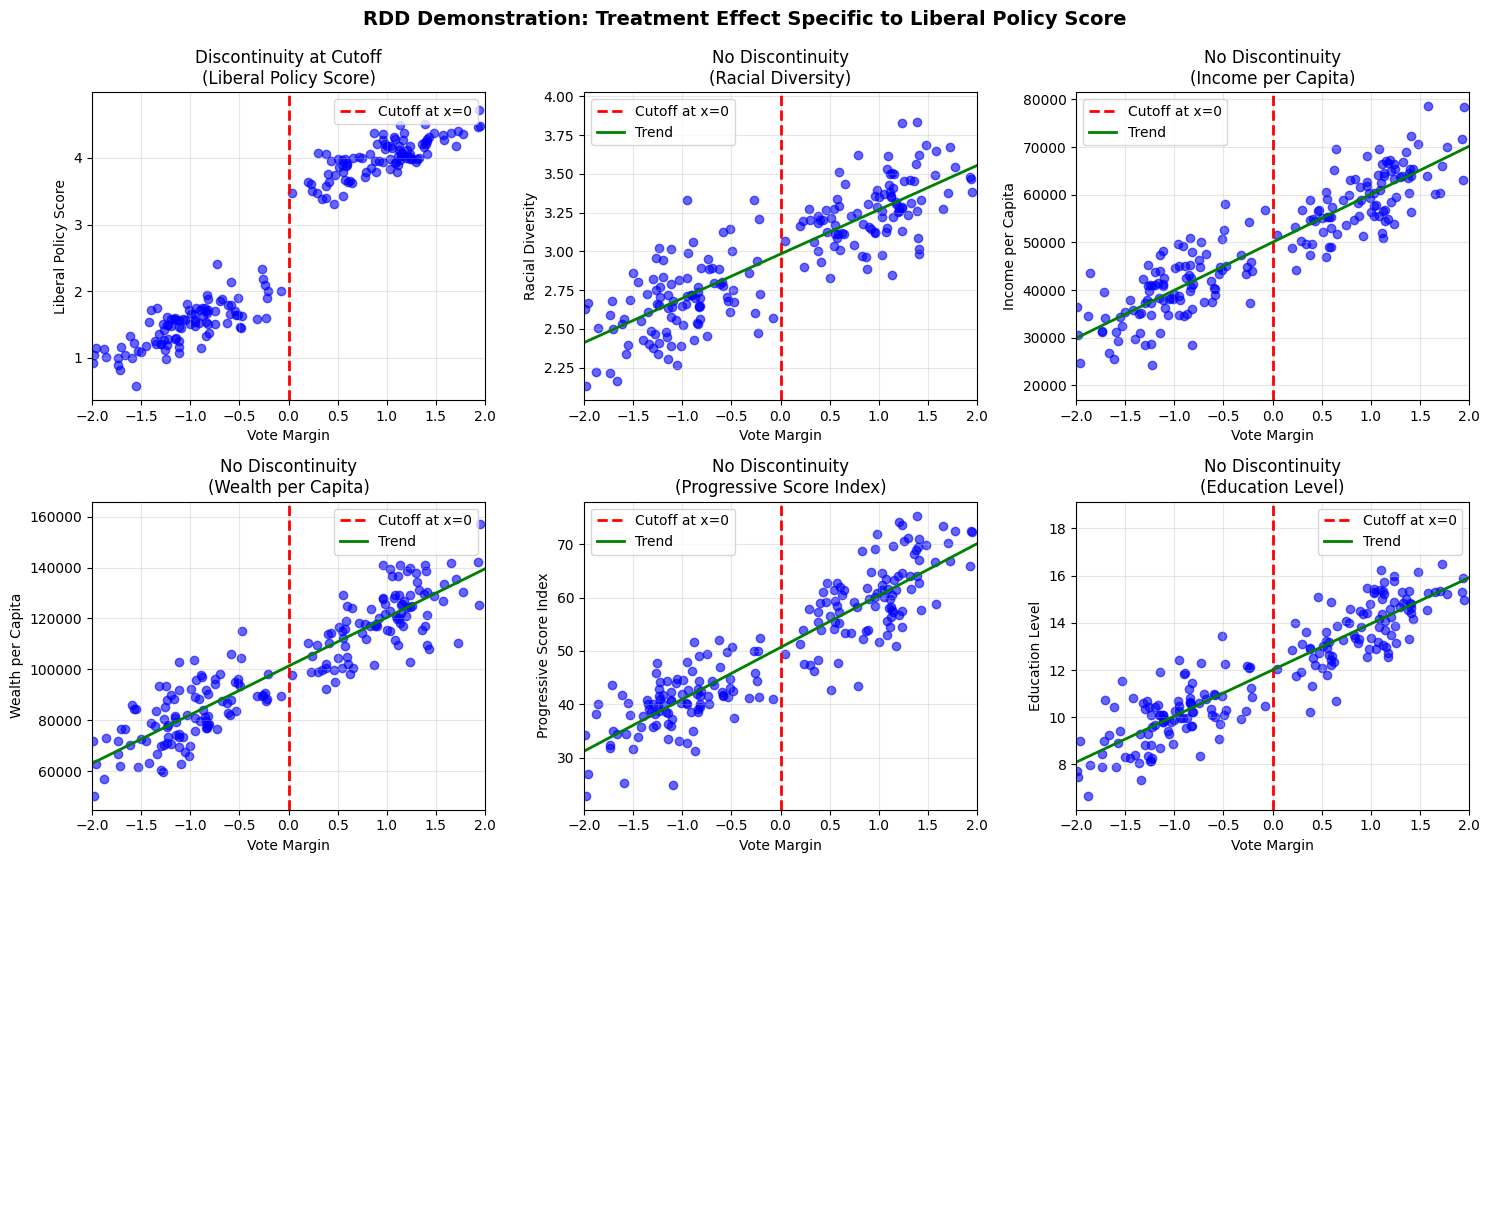

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate base data
np.random.seed(42)
n_points = 200
x = np.concatenate([np.random.normal(-1, 0.5, n_points//2), np.random.normal(1, 0.5, n_points//2)])  # Vote margin
base_y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)  # Base outcome

# Create data for Liberal Policy Score with discontinuity at cutoff = 0
y_liberal_policy = base_y.copy()
y_liberal_policy[x >= 0] += 1.5  # Treatment effect at cutoff = 0

# Create data for continuous outcomes (no discontinuity)
y_racial_diversity = 3 + 0.3 * x + np.random.normal(0, 0.2, n_points)
y_income_per_capita = 50000 + 10000 * x + np.random.normal(0, 5000, n_points)
y_wealth_per_capita = 100000 + 20000 * x + np.random.normal(0, 10000, n_points)
y_progressive_score = 50 + 10 * x + np.random.normal(0, 5, n_points)
y_education_level = 12 + 2 * x + np.random.normal(0, 1, n_points)  # Additional continuous variable

# Create the 3x3 panel
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Set common x-axis limits
x_min, x_max = -2, 2

# Plot 1: Vote Margin vs. Liberal Policy Score (with discontinuity)
axes[0].scatter(x, y_liberal_policy, alpha=0.6, color='blue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[0].set_xlim(x_min, x_max)
axes[0].set_xlabel('Vote Margin')
axes[0].set_ylabel('Liberal Policy Score')
axes[0].set_title('Discontinuity at Cutoff\n(Liberal Policy Score)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Plot 2: Vote Margin vs. Racial Diversity (continuous)
axes[1].scatter(x, y_racial_diversity, alpha=0.6, color='blue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[1].set_xlim(x_min, x_max)
axes[1].set_xlabel('Vote Margin')
axes[1].set_ylabel('Racial Diversity')
axes[1].set_title('No Discontinuity\n(Racial Diversity)')
axes[1].grid(True, alpha=0.3)
z = np.polyfit(x, y_racial_diversity, 1)
p = np.poly1d(z)
x_trend = np.linspace(x_min, x_max, 100)
axes[1].plot(x_trend, p(x_trend), 'green', linewidth=2, label='Trend')
axes[1].legend()

# Plot 3: Vote Margin vs. Income per Capita (continuous)
axes[2].scatter(x, y_income_per_capita, alpha=0.6, color='blue')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[2].set_xlim(x_min, x_max)
axes[2].set_xlabel('Vote Margin')
axes[2].set_ylabel('Income per Capita')
axes[2].set_title('No Discontinuity\n(Income per Capita)')
axes[2].grid(True, alpha=0.3)
z = np.polyfit(x, y_income_per_capita, 1)
p = np.poly1d(z)
axes[2].plot(x_trend, p(x_trend), 'green', linewidth=2, label='Trend')
axes[2].legend()

# Plot 4: Vote Margin vs. Wealth per Capita (continuous)
axes[3].scatter(x, y_wealth_per_capita, alpha=0.6, color='blue')
axes[3].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[3].set_xlim(x_min, x_max)
axes[3].set_xlabel('Vote Margin')
axes[3].set_ylabel('Wealth per Capita')
axes[3].set_title('No Discontinuity\n(Wealth per Capita)')
axes[3].grid(True, alpha=0.3)
z = np.polyfit(x, y_wealth_per_capita, 1)
p = np.poly1d(z)
axes[3].plot(x_trend, p(x_trend), 'green', linewidth=2, label='Trend')
axes[3].legend()

# Plot 5: Vote Margin vs. Progressive Score Index (continuous)
axes[4].scatter(x, y_progressive_score, alpha=0.6, color='blue')
axes[4].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[4].set_xlim(x_min, x_max)
axes[4].set_xlabel('Vote Margin')
axes[4].set_ylabel('Progressive Score Index')
axes[4].set_title('No Discontinuity\n(Progressive Score Index)')
axes[4].grid(True, alpha=0.3)
z = np.polyfit(x, y_progressive_score, 1)
p = np.poly1d(z)
axes[4].plot(x_trend, p(x_trend), 'green', linewidth=2, label='Trend')
axes[4].legend()

# Plot 6: Vote Margin vs. Education Level (continuous)
axes[5].scatter(x, y_education_level, alpha=0.6, color='blue')
axes[5].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cutoff at x=0')
axes[5].set_xlim(x_min, x_max)
axes[5].set_xlabel('Vote Margin')
axes[5].set_ylabel('Education Level')
axes[5].set_title('No Discontinuity\n(Education Level)')
axes[5].grid(True, alpha=0.3)
z = np.polyfit(x, y_education_level, 1)
p = np.poly1d(z)
axes[5].plot(x_trend, p(x_trend), 'green', linewidth=2, label='Trend')
axes[5].legend()

# Leave plots 7, 8, 9 empty
for i in range(6, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('RDD Demonstration: Treatment Effect Specific to Liberal Policy Score', y=1.02, fontsize=14, fontweight='bold')
plt.show()